# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Here we import all necessary Python packages to solve the tasks:

In [8]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from ExchangeEconomy import ExchangeEconomyClass

In [10]:
model = ExchangeEconomyClass()

In [35]:
from scipy import optimize ## will be necessary to use solve from task 4 onwards 

# Question 1

We used a self-defined function to get all pareto-improvments and later plotted all solutions in an Egdeworth-Box.


0.3333333333333333
namespace(alpha=0.3333333333333333, beta=0.6666666666666666, p2=1, w1A=0.8, w2A=0.3)
0.41601676461038084
0.30365889718756617
[[0.08       0.96      ]
 [0.09333333 0.88      ]
 [0.09333333 0.89333333]
 ...
 [0.78666667 0.34666667]
 [0.78666667 0.36      ]
 [0.78666667 0.37333333]]


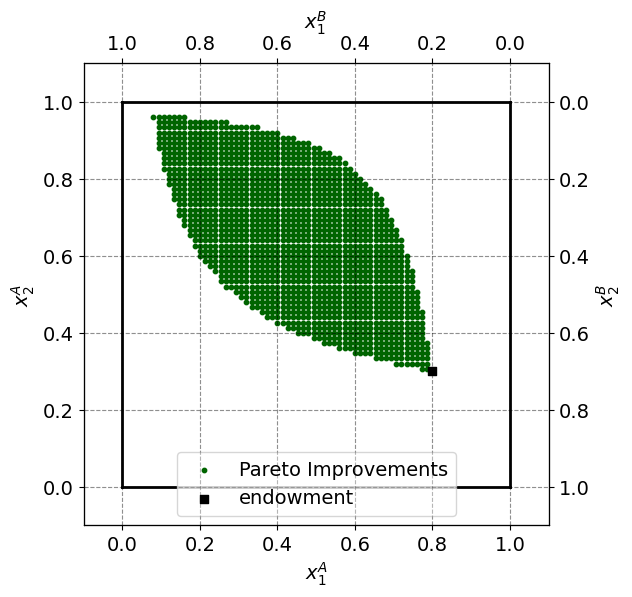

In [11]:
import numpy as np
model = ExchangeEconomyClass()
parameters = model.par
print(parameters.alpha)
print(parameters)
utility_personA = model.utility_A(parameters.w1A, parameters.w2A)
print(utility_personA)
utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)
print(utility_personB)


# code for solving the model 
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

## here define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB


## loop over x1 and x2 and get all combinations
N = 75 ## given in the Task! 
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A))



# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

#Plotting Pareto improvements and initial endowment
pareto_improvements = np.array(pareto_improvements)
print(pareto_improvements)
ax_A.scatter(pareto_improvements[:, 0], pareto_improvements[:, 1], color='darkgreen', label='Pareto Improvements', s=10)
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

## add legend with pareto improvments and initial endowments
ax_A.legend()





# Question 2

Here we calculate the error in the market clearing condition and present it for each p1 being an element of P1.

In [12]:
## defining p1 
N = 75  ## from task 1
P1 = [] ## empty list
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)



[0.5   0.527 0.553 0.58  0.607 0.633 0.66  0.687 0.713 0.74  0.767 0.793
 0.82  0.847 0.873 0.9   0.927 0.953 0.98  1.007 1.033 1.06  1.087 1.113
 1.14  1.167 1.193 1.22  1.247 1.273 1.3   1.327 1.353 1.38  1.407 1.433
 1.46  1.487 1.513 1.54  1.567 1.593 1.62  1.647 1.673 1.7   1.727 1.753
 1.78  1.807 1.833 1.86  1.887 1.913 1.94  1.967 1.993 2.02  2.047 2.073
 2.1   2.127 2.153 2.18  2.207 2.233 2.26  2.287 2.313 2.34  2.367 2.393
 2.42  2.447 2.473 2.5  ]


Here we go through each value in P1 to calculate the market error for each of the two goods:

In [13]:
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    print(f"For p1 = {p1}:")
    print("   Error in market clearing condition 1:", eps1)
    print("   Error in market clearing condition 2:", eps2)


For p1 = 0.5:
   Error in market clearing condition 1: 0.5333333333333332
   Error in market clearing condition 2: -0.2666666666666666
For p1 = 0.527:
   Error in market clearing condition 1: 0.4752688172043007
   Error in market clearing condition 2: -0.2504666666666665
For p1 = 0.553:
   Error in market clearing condition 1: 0.4247136829415309
   Error in market clearing condition 2: -0.23486666666666645
For p1 = 0.58:
   Error in market clearing condition 1: 0.3770114942528733
   Error in market clearing condition 2: -0.2186666666666665
For p1 = 0.607:
   Error in market clearing condition 1: 0.3335529928610652
   Error in market clearing condition 2: -0.20246666666666646
For p1 = 0.633:
   Error in market clearing condition 1: 0.2952080042127434
   Error in market clearing condition 2: -0.18686666666666651
For p1 = 0.66:
   Error in market clearing condition 1: 0.25858585858585836
   Error in market clearing condition 2: -0.1706666666666664
For p1 = 0.687:
   Error in market cleari

# Question 3

Explain your code and procedure

/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  demand_x1 =  self.par.alpha * (p1*self.par.w1A + self.par.w2A)/p1
/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  demand_x1 = self.par.beta * (p1* (1-self.par.w1A) + 1- self.par.w2A)/p1


0.0009523809523811488
0.0009009009009011137


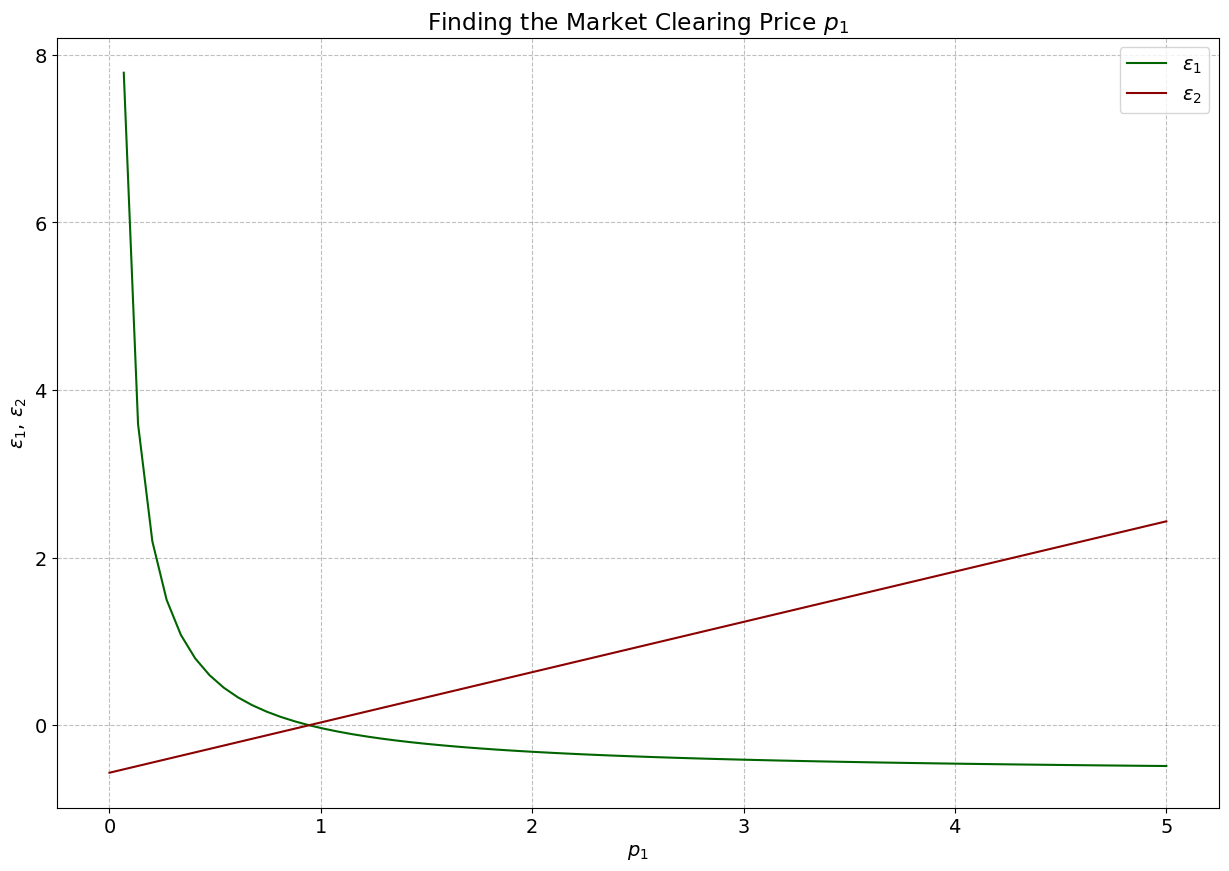

In [25]:
N  = 75
P1 = np.linspace(0, 5, N)

# Calculate market clearing errors for each p1 in P1
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    epsilon_1.append(eps1) ## add 
    epsilon_2.append(eps2)

print(np.min(np.abs(epsilon_1)))
print(np.min(np.abs(epsilon_2)))


# Plotting
plt.figure(figsize=(15, 10))
plt.plot(P1, epsilon_1, label='$\\epsilon_1$', color='darkgreen')
plt.plot(P1, epsilon_2, label='$\\epsilon_2$', color='darkred')
plt.title('Finding the Market Clearing Price $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('$\\epsilon_1$, $\\epsilon_2$')
plt.legend()
plt.show()


In [24]:
## for which p1 do we get the intersection? 
# Find the point of intersection
intersection_point = None
for i in range(1, len(P1)):
    if (epsilon_1[i] > 0 and epsilon_2[i] < 0) or (epsilon_1[i] < 0 and epsilon_2[i] > 0):
        intersection_point = 1-P1[i]
        break ## there can only be one market clearing price, 
    ## so we break the loop after finding the first intersection point!

print("Intersection point:", intersection_point)

Intersection point: 0.9324324324324325


# Question 4

## 4a

In [27]:
## solution petra: 0.953
negative_utility = -np.inf
value = []
x1_0 = []
x2_0 = []
p_solution = np.nan

N = 75  ## redefining from task 1
P1 = []
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)


for p1 in P1: 
    x1B, x2B = model.demand_B(p1) 
    x1A = 1 - x1B 
    x2A = 1 - x2B
    utility_A_now = model.utility_A(1-x1B, 1-x2B)
    if utility_A_now > negative_utility: 
        negative_utility = utility_A_now
        x1_0.append(x1A)
        x2_0.append(x2A)
        p_solution = p1

print("Maximum Utility for A:", negative_utility)
print("Optimal x1 for A:", x1_0)
print("Optimal x2 for A:", x2_0)
print("Optimal price:", p_solution)
print("Demand for A at optimal price:", model.demand_A(p_solution))

Maximum Utility for A: 0.6336162385929179
Optimal x1 for A: [0.0227848101265824, 0.062068965517241614, 0.097858319604613, 0.12943654555028972, 0.15959595959595985, 0.18738476467734133, 0.21215521271622273, 0.23603603603603618, 0.2582355497609735, 0.2781841109709965, 0.29756097560975625, 0.3157024793388431, 0.33211149293623543, 0.3481481481481483, 0.3632506292700468, 0.37698495977614555, 0.39047619047619053, 0.4032439589539887, 0.41490803484995176, 0.42641509433962277, 0.4373505059797609, 0.4473794549266249, 0.4573099415204679, 0.466780919737218, 0.47549594858899147, 0.4841530054644809, 0.49243517775995727, 0.5000785545954439, 0.5076923076923078, 0.5149962321024869, 0.5217541266321755, 0.5285024154589373, 0.5349917081260366, 0.5410095371016517, 0.5470319634703198, 0.5528356870656805, 0.5582286847323199, 0.5636363636363637, 0.5688576898532227, 0.5737183511194811, 0.5786008230452676, 0.5833232139243069, 0.5877266387726638, 0.5921568627450982, 0.5964485620536577, 0.6004563605248145, 0.6044

## 4b

In [34]:
p = 0
## use solver since P1 needs to be positve 

def constraint_p(p):
    return p  # This ensures that p is non-negative

#def constraints(p):
 #   x1A, x2A = model.demand_A(p)
#   x1B, x2B = model.demand_B(p)
#  return [x1A + x1B - 1, x2A + x2B - 1, p]  # Ensuring demands sum up to 1 and p is non-negative

constraints ={'type': 'ineq', 'fun': constraint_p} ## adding constraint for p 
## we have to somehow add that x1_A and x2_A need to be between 0 and 1 and x1_A + x1_B sums to 1 as well as
## as x2_A + x2_B = 1 

## bounds for solutions
bounds = [(0,None)] ## non negative price 

# c. call solver, use SLSQP
initial_guess = 1
## slsqp als method kann bounds und constrains annehmen
sol_case2 = optimize.minimize(
model.negative_utility_A, initial_guess, bounds = bounds,
method='SLSQP',constraints= constraints)

p_optimum = sol_case2.x
print("Optimal price", p_optimum) ## optimal price 
#print(model.demand_A(p_optimum)) ## can this really be?
#print(1-model.demand_B(p_optimum)[0], 1-model.demand_B(p_optimum)[1])
print("optimal amount of good 1 for person A", 1-model.demand_B(p_optimum)[0])
print("optimal amount of good 2 for person A",1-model.demand_B(p_optimum)[1])
print("Utility for person A in optimum", -model.negative_utility_A(p_optimum))

Optimal price [1.89678021]
optimal amount of good 1 for person A [0.6206357]
optimal amount of good 2 for person A [0.64021465]
Utility for person A in optimum [0.63362065]
